### Preparing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Size of the house (in 1000 ft^2)
x = np.array([1.0, 5.0])
# Price of the house (in 1000 dollars)
y = np.array([300.0, 800.0])

### Plotting the dataset

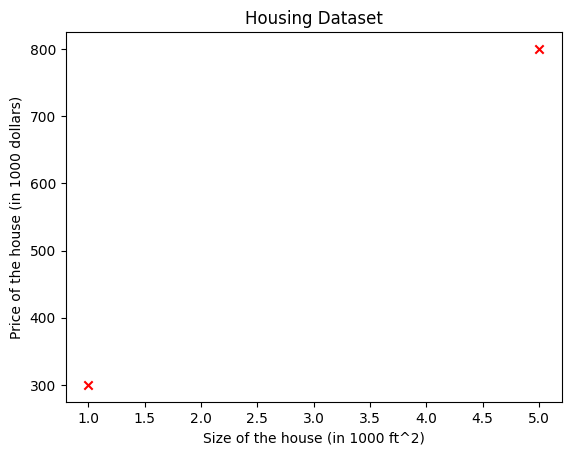

In [3]:
def plot_data_scatter(x_axis, y_axis, x_label="X axis", y_label="Y axis", title="Title"):
    plt.scatter(x_axis, y_axis, c='r', marker='x')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    #plt.show()

plot_data_scatter(x, y, "Size of the house (in 1000 ft^2)", "Price of the house (in 1000 dollars)", "Housing Dataset")

### Defining Hypothesis function

In [4]:
# Defining the hypothesis function (univariate linear regression)
def uni_linear_reg(x, w, b):
    # Size of the dataset
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

### Plotting the Hypothesis function

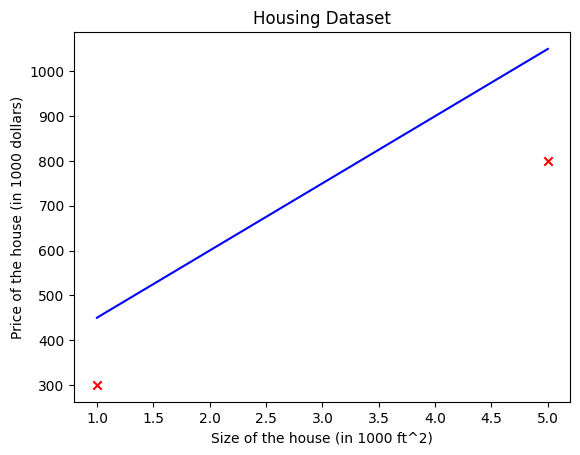

In [5]:
# Plotting the function
def plot_hypothesis_func(x, y, hypothesis, w, b, x_label="X axis", y_label="Y axis", title="Title"):
    y_pred = hypothesis(x, w, b)
    plt.plot(x, y_pred, c='b')
    plot_data_scatter(x, y, x_label, y_label, title)
    plt.show()

plot_hypothesis_func(x, y, uni_linear_reg, 150, 300,  "Size of the house (in 1000 ft^2)", "Price of the house (in 1000 dollars)", "Housing Dataset")

### Running Manual Gradient Descent

In [6]:
from IPython.display import clear_output
def manual_grad_desc(x, y, hypothesis, x_label="X axis", y_label="Y axis", title="Title"):
    count = 0
    CONTINUE = True
    while CONTINUE:
        clear_output()
        if count != 0:
            print("Your task is to try your best to fit the 'blue' line with the 'red' spots")
            print(f"Previous weight (w): {w}")
            print(f"Previous bias (b): {b}")
        w = int(input("Enter value of weight (w): "))
        b = int(input("Enter value of bias (b): "))
        plot_hypothesis_func(x, y, hypothesis, w, b, x_label, y_label, title)
        print("Try more values of w and b? (y/n)")
        response = input()
        if response == 'n' or response == 'N':
            CONTINUE = False
        else:
            count += 1

In [ ]:
manual_grad_desc(x, y, uni_linear_reg, "Size of the house (in 1000 ft^2)", "Price of the house (in 1000 dollars)", "Housing Dataset")

### Computing Cost

In [7]:
# Compute cost as Mean Square Error (MSE)
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        sq_err = (f_wb - y[i]) ** 2
        cost += sq_err
    total_cost = 1 / (2 * m) * cost
    return total_cost

### Visualizing Cost

In [8]:
# To visualise the cost function lets take some sample values for (w, b) and then compute cost for each pair
def visualize_cost(x, y, cost_function):
    w = np.array([100, 150, 200])
    b = np.array([200, 150, 100])
    m = w.shape[0]
    costs = []
    for i in range(m):
        costs.append(cost_function(x, y, w[i], b[i]))

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(w, b, costs)
    ax.set_xlabel('Weight (w)')
    ax.set_ylabel('Bias (b)')
    ax.set_zlabel('Cost (J)')
    plt.show()

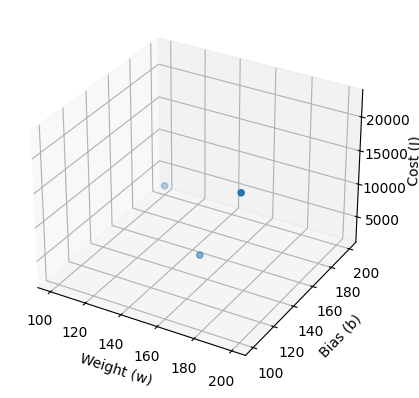

In [9]:
visualize_cost(x, y, compute_cost)

### Calculating Gradient / Scope

In [10]:
# Function to calculate gradient
def calc_grad(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [71]:
# Function that implements gradient descent algorithm
def gradient_descent(x, y, w, b, num_iters, alpha, cost_function, gradient_function):
    cost_record = []
    w_record = []
    b_record = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i % 5000 == 0:
            cost = cost_function(x, y, w, b)
            print(f"Iteration: {i:4}", f"Cost: {cost:0.2e}", f"w: {w:0.3e}", f"b: {b:0.5e}")
            cost_record.append(cost)
            w_record.append(w)
            b_record.append(b)
    return w, b, cost_record

In [72]:
# Making dummy dataset

# Initializing the parameters
w_init = 0
b_init = 0
num_iters = 10000
alpha = 1.0e-2
w, b, cost_record = gradient_descent(x, y, w_init, b_init, num_iters, alpha, compute_cost, calc_grad)
print(f"Final value of w: {w}")
print(f"Final value of b: {b}")

Iteration:    0 Cost: 1.37e+05 w: 2.150e+01 b: 5.50000e+00
Iteration: 5000 Cost: 5.92e-10 w: 1.250e+02 b: 1.75000e+02
Final value of w: 125.00000000000672
Final value of b: 174.99999999997158


In [ ]:
manual_grad_desc(x, y, uni_linear_reg, "Size of the house (in 1000 ft^2)", "Price of the house (in 1000 dollars)", "Housing Dataset")

### Working with a sample dataset

In [42]:
data = pd.read_csv("../house_price_prediction.csv")

In [63]:
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [73]:
X_train = data["Area"][:75].to_numpy()
Y_train = data["Price"][:75].to_numpy()
X_test = data["Area"][75:100].to_numpy()
Y_test = data["Price"][75:100].to_numpy()
print(X_train.shape)
print(X_test.shape)

(75,)
(25,)


In [45]:
def convert_to_float(A):
    B = A.copy()
    for i in range(A.shape[0]):
        B[i] = float(A[i])
    return B

In [46]:
def rescale_feature(A):
    B = A.copy()
    for i in range(A.shape[0]):
        B[i] = A[i] / 1000
    return B

In [47]:
# Testing functions
# print(convert_to_float(X))
# print(type(convert_to_float(X)))
# print(rescale_feature(X))

In [78]:
# Initialize parameters
w_init = 0
b_init = 0
num_iters = 100000
alpha = 1.0e-5
w, b, cost_record = gradient_descent(rescale_feature(X_train), convert_to_float(Y_train), w_init, b_init, num_iters, alpha, compute_cost, calc_grad)
print(f"Final value of w: {w}")
print(f"Final value of b: {b}")

Iteration:    0 Cost: 2.01e+11 w: 1.176e+01 b: 5.69151e+00
Iteration: 5000 Cost: 1.39e+11 w: 4.950e+04 b: 2.50660e+04
Iteration: 10000 Cost: 1.07e+11 w: 8.411e+04 b: 4.46606e+04
Iteration: 15000 Cost: 9.04e+10 w: 1.081e+05 b: 6.03429e+04
Iteration: 20000 Cost: 8.16e+10 w: 1.246e+05 b: 7.32189e+04
Iteration: 25000 Cost: 7.67e+10 w: 1.357e+05 b: 8.40765e+04
Iteration: 30000 Cost: 7.39e+10 w: 1.430e+05 b: 9.34766e+04
Iteration: 35000 Cost: 7.21e+10 w: 1.476e+05 b: 1.01819e+05
Iteration: 40000 Cost: 7.08e+10 w: 1.503e+05 b: 1.09388e+05
Iteration: 45000 Cost: 6.97e+10 w: 1.516e+05 b: 1.16387e+05
Iteration: 50000 Cost: 6.89e+10 w: 1.520e+05 b: 1.22961e+05
Iteration: 55000 Cost: 6.81e+10 w: 1.517e+05 b: 1.29212e+05
Iteration: 60000 Cost: 6.74e+10 w: 1.509e+05 b: 1.35215e+05
Iteration: 65000 Cost: 6.67e+10 w: 1.498e+05 b: 1.41023e+05
Iteration: 70000 Cost: 6.60e+10 w: 1.485e+05 b: 1.46672e+05
Iteration: 75000 Cost: 6.53e+10 w: 1.470e+05 b: 1.52191e+05
Iteration: 80000 Cost: 6.47e+10 w: 1.454e+

In [19]:
x

array([1., 5.])

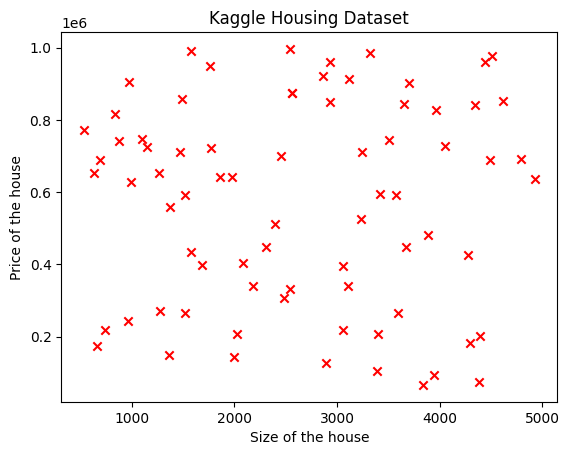

In [68]:
plot_data_scatter(X_train, Y_train, "Size of the house", "Price of the house", "Kaggle Housing Dataset")
# plt.ylim(0, 1e6)
# plt.xlim(0, 6000)

In [ ]:
manual_grad_desc(X, Y, uni_linear_reg, "Size of the house (in 1000 ft^2)", "Price of the house (in 1000 dollars)", "Housing Dataset")

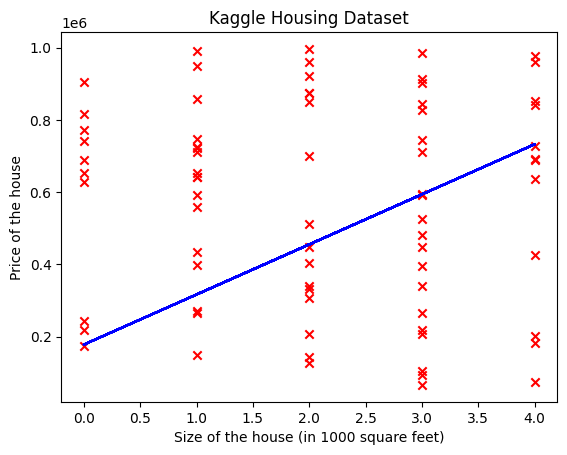

In [81]:
plot_hypothesis_func(rescale_feature(X_train), convert_to_float(Y_train), uni_linear_reg, 138583, 178346,  "Size of the house (in 1000 square feet)", "Price of the house", "Kaggle Housing Dataset")

In [ ]:
# to perform feature engineering and then try running gradient descent